# Data Analysis with Python

Kim Hee (Graduate research assistant) <br>
Universitätsmedizin Mannheim, Mannheim (UMM)

* This is prepared for `Data analysis tools (Datenanalysewerkzeuge)` at MIRACUM summer school 2019

## Prerequisite: Access the MIMIC Dataset
The MIMIC (Medical Information Mart for Intensive Care) is a freely accessible database containing Intensive Care Unit (ICU) patients. The demo dataset is limited to 100 patients and publicly available as CSV files or as a single Postgres database backup file

>**Instruction to access the MIMIC demo dataset:**
<font size="3">
>1. Create an account on PhysioNet using the following link: https://physionet.org/pnw/login
>2. Navigate to the project page: https://physionet.org/works/MIMICIIIClinicalDatabaseDemo/
>3. Read the Data Use Agreement and click “I agree” to access the data
</font>

<img src="images/er_mimic.png" style="width:100%">

* Database description: https://mimic.physionet.org/gettingstarted/overview/
* Table description: https://mimic.physionet.org/mimictables/admissions/
* ER-Diagram: https://mit-lcp.github.io/mimic-schema-spy/relationships.html

**Agenda**
* <b>Data Analysis</b> and </b>Visualization</b>
 * <b>Pandas</b>
 * </b>Pandas-Profiling</b>
 * </b>Missingno</b>
 * </b>Wordcloud</b>

## Pandas
http://pandas.pydata.org/pandas-docs/stable/reference/ <br>
Pandas is a Python library for exploring, processing, and model data

### Import and load pandas and an ODBC drive called psycopg2 (1/9)

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 999)
import pandas.io.sql as psql
import psycopg2

### Query the meta data (2/9)

In [3]:
DB_IP = "129.206.5.27"
conn = psycopg2.connect(f"postgres://postgres:postgres@{DB_IP}:5432/mimic")

In [4]:
sql = "SELECT * FROM pg_catalog.pg_tables \
        WHERE schemaname = 'public'"
temp = psql.read_sql(sql, conn)
temp.tail() # Print the last five tables

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
38,public,services,postgres,None,True,False,True,False
39,public,transfers,postgres,None,True,False,True,False
40,public,patients,postgres,None,True,False,True,False
41,public,d_items,postgres,None,True,False,True,False
42,public,icustays,postgres,None,True,False,True,False


### Query the admissions table and the patients table (3/9)

In [5]:
sql = "SELECT * FROM admissions"
a = psql.read_sql(sql, conn)
a.head(5)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,None,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaT,NaT,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,None,CATHOLIC,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,None,CATHOLIC,DIVORCED,WHITE,NaT,NaT,ALCOHOLIC HEPATITIS,1,1


In [6]:
sql = "SELECT * FROM patients"
p = psql.read_sql(sql, conn)
p.head()

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05,2165-08-12,2165-08-12,2165-08-12,1
1,9472,10011,F,2090-06-05,2126-08-28,2126-08-28,NaT,1
2,9474,10013,F,2038-09-03,2125-10-07,2125-10-07,2125-10-07,1
3,9478,10017,F,2075-09-21,2152-09-12,NaT,2152-09-12,1
4,9479,10019,M,2114-06-20,2163-05-15,2163-05-15,2163-05-15,1


### Order by admission time and <br> print the first and the last five records (4/9)

In [7]:
a.sort_values(by = 'admittime').head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
75,40496,42231,171878,2102-08-29 07:15:00,2102-09-06 16:20:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaT,NaT,RENAL CANCER/SDA,0,1
113,40993,43881,172454,2104-09-24 17:31:00,2104-09-30 16:17:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2104-09-24 12:07:00,2104-09-24 18:50:00,ACUTE PULMONARY EMBOLISM,0,1
114,40994,43881,167021,2104-10-24 09:44:00,2104-11-01 11:59:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2104-10-24 07:17:00,2104-10-24 11:10:00,UPPER GI BLEED,0,1
40,12353,10102,164869,2105-05-29 18:18:00,2105-06-11 02:20:00,2105-06-11 02:20:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,None,CATHOLIC,MARRIED,WHITE,NaT,NaT,CHRONIC MYELOGENOUS LEUKEMIA;TRANSFUSION REACTION,1,1
112,40992,43879,158100,2106-08-30 15:43:00,2106-08-31 15:15:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Medicare,ENGL,PROTESTANT QUAKER,MARRIED,BLACK/AFRICAN AMERICAN,NaT,NaT,PLEURAL EFFUSION,0,1


In [8]:
a.sort_values(by = 'admittime').tail()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
108,40406,41976,179418,2201-12-31 19:19:00,2202-01-03 17:55:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,SPAN,CATHOLIC,MARRIED,HISPANIC/LATINO - PUERTO RICAN,2201-12-31 17:41:00,2201-12-31 23:05:00,PNEUMONIA,0,1
109,40407,41976,151798,2202-02-15 19:01:00,2202-02-19 16:42:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,SPAN,CATHOLIC,MARRIED,HISPANIC/LATINO - PUERTO RICAN,2202-02-15 16:35:00,2202-02-15 21:00:00,UTI/PYELONEPHRITIS,0,1
110,40408,41976,145024,2202-05-01 22:00:00,2202-05-04 18:42:00,NaT,EMERGENCY,TRANSFER FROM SKILLED NUR,SNF,Medicare,SPAN,CATHOLIC,MARRIED,HISPANIC/LATINO - PUERTO RICAN,2202-05-01 19:32:00,2202-05-01 23:30:00,RESPIRATORY DISTRESS,0,1
111,40409,41976,149469,2202-09-16 21:56:00,2202-09-23 16:20:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,ICF,Medicare,SPAN,CATHOLIC,MARRIED,HISPANIC/LATINO - PUERTO RICAN,2202-09-16 18:24:00,2202-09-16 23:35:00,SEPSIS,0,1
124,40410,41976,153826,2202-10-03 01:45:00,2202-10-11 16:30:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,ICF,Medicare,SPAN,CATHOLIC,MARRIED,HISPANIC/LATINO - PUERTO RICAN,2202-10-03 01:19:00,2202-10-03 03:40:00,SEPSIS,0,1


### GROUPBY function example (5/9)

In [9]:
a.groupby(['admission_type']).count()['row_id']

admission_type
ELECTIVE       8
EMERGENCY    119
URGENT         2
Name: row_id, dtype: int64

### built-in function example (6/9)

In [10]:
a['admission_type'].value_counts()

EMERGENCY    119
ELECTIVE       8
URGENT         2
Name: admission_type, dtype: int64

### JOIN function example (7/9)

In [11]:
ap = pd.merge(a, p, on = 'subject_id' , how = 'inner')
ap.head()

,row_id_x,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,row_id_y,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,None,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1,9467,F,2094-03-05,2165-08-12,2165-08-12,2165-08-12,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaT,NaT,HEPATITIS B,1,1,9472,F,2090-06-05,2126-08-28,2126-08-28,NaT,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,None,CATHOLIC,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,SEPSIS,1,1,9474,F,2038-09-03,2125-10-07,2125-10-07,2125-10-07,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1,9478,F,2075-09-21,2152-09-12,NaT,2152-09-12,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,None,CATHOLIC,DIVORCED,WHITE,NaT,NaT,ALCOHOLIC HEPATITIS,1,1,9479,M,2114-06-20,2163-05-15,2163-05-15,2163-05-15,1


### Create a new column (8/9)

In [12]:
ap['age'] = ap['admittime'].dt.year - ap['dob'].dt.year
ap.head()

,row_id_x,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,row_id_y,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,age
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,None,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1,9467,F,2094-03-05,2165-08-12,2165-08-12,2165-08-12,1,70
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaT,NaT,HEPATITIS B,1,1,9472,F,2090-06-05,2126-08-28,2126-08-28,NaT,1,36
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,None,CATHOLIC,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,SEPSIS,1,1,9474,F,2038-09-03,2125-10-07,2125-10-07,2125-10-07,1,87
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1,9478,F,2075-09-21,2152-09-12,NaT,2152-09-12,1,74
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,None,CATHOLIC,DIVORCED,WHITE,NaT,NaT,ALCOHOLIC HEPATITIS,1,1,9479,M,2114-06-20,2163-05-15,2163-05-15,2163-05-15,1,49


### WHERE function example (9/9)

In [13]:
ap[ ap['diagnosis'] == 'ASTHMA' ]

,row_id_x,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,row_id_y,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,age


In [14]:
ap[ap['diagnosis'].str.contains('ASTHMA')]

,row_id_x,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,row_id_y,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,age
79,40514,42302,167754,2160-05-04 14:10:00,2160-05-08 11:55:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,NOT SPECIFIED,SINGLE,WHITE,2160-05-04 11:05:00,2160-05-04 15:48:00,ASTHMA/COPD FLARE,0,1,31397,F,2074-09-29,2160-06-08,NaT,2160-06-08,1,86
83,40349,41795,138132,2145-07-07 01:19:00,2145-07-20 19:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,2145-07-06 22:59:00,2145-07-07 02:16:00,ASTHMA;CHRONIC OBST PULM DISEASE,0,1,31277,M,2096-07-25,2145-12-06,NaT,2145-12-06,1,49
84,40350,41795,118192,2145-09-06 08:52:00,2145-09-09 16:25:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,2145-09-05 22:24:00,2145-09-06 10:14:00,ASTHMA;CHRONIC OBST PULM DISEASE,0,1,31277,M,2096-07-25,2145-12-06,NaT,2145-12-06,1,49


**Agenda**
* <b>Data</b> Analysis and <b>Visualization</b>
 * <b>Pandas</b>
 * </b>Missingno</b>
 * </b>Pandas-Profiling</b>
 * </b>Wordcloud</b>

## Pandas supports charting a tabular dataset
DataFrame.plot([x, y], **kind**)
> **kind** :
* 'line': line plot (default)
* 'bar': vertical bar plot
* 'barh': horizontal bar plot
* 'hist': histogram
* 'box': boxplot
* 'kde': Kernel Density Estimation plot
* 'density': same as 'kde'
* 'area': stacked area plot
* 'pie': pie plot
* 'scatter': scatter plot
* 'hexbin': Hexagonal binning plot 


<img src="images/DataVisualisation.jpeg" style="height: 1000px;"/>

### Visualize the admission table

In [15]:
# plot a figure directly on Notebook
import matplotlib.pyplot as plt
%matplotlib inline 

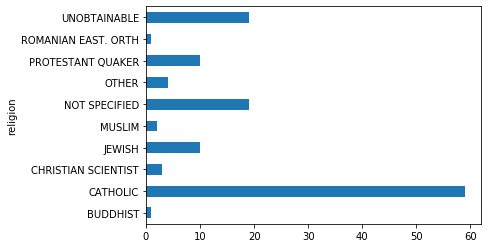

In [16]:
a.groupby(['religion']).count()['row_id'].plot(kind = 'barh') 

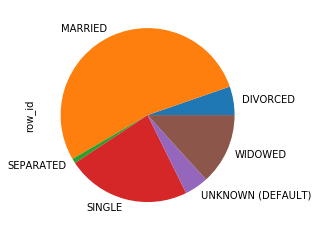

In [17]:
a.groupby(['marital_status']).count()['row_id'].plot(kind='pie')

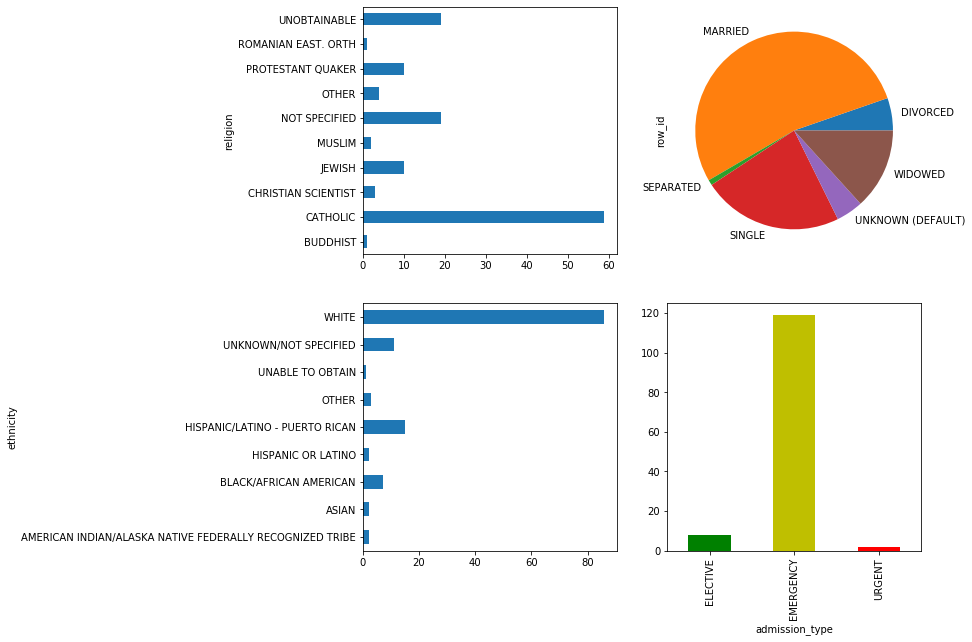

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
a.groupby(['religion']).count()['row_id'].plot(ax = axes[0,0], kind = 'barh')
a.groupby(['marital_status']).count()['row_id'].plot(ax = axes[0,1], kind = 'pie')
a.groupby(['ethnicity']).count()['row_id'].plot(ax = axes[1,0], kind = 'barh')
a.groupby(['admission_type']).count()['row_id'].plot(ax = axes[1,1], kind = 'bar', color = ['g','y','r'])

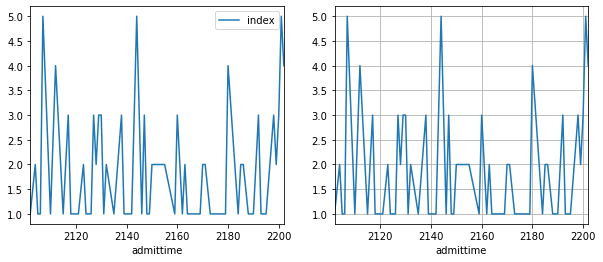

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
a['admittime'].dt.year.reset_index().groupby(['admittime']).count().plot(ax = axes[0])
a['admittime'].dt.year.reset_index().groupby(['admittime']).count().plot(ax = axes[1], grid = True, legend = False)

**Agenda**
* <b>Data</b> Analysis and <b>Visualization</b>
 * </b>Pandas</b>
 * <b>Missingno</b>
 * </b>Pandas-Profiling</b>
 * </b>Wordcloud</b>

## Missingno
https://github.com/ResidentMario/missingno <br>
Missingno offers a visual summary of the completeness of a dataset

### Import missingno (1/2)

In [23]:
import missingno as msno

### Depict the missing values (2/2)

In [24]:
sql = "SELECT * FROM labevents"
lab = psql.read_sql(sql, conn)
lab.head(1)

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
0,6294375,10120,193924.0,51214,2115-05-13 14:53:00,226,226.0,mg/dL,None


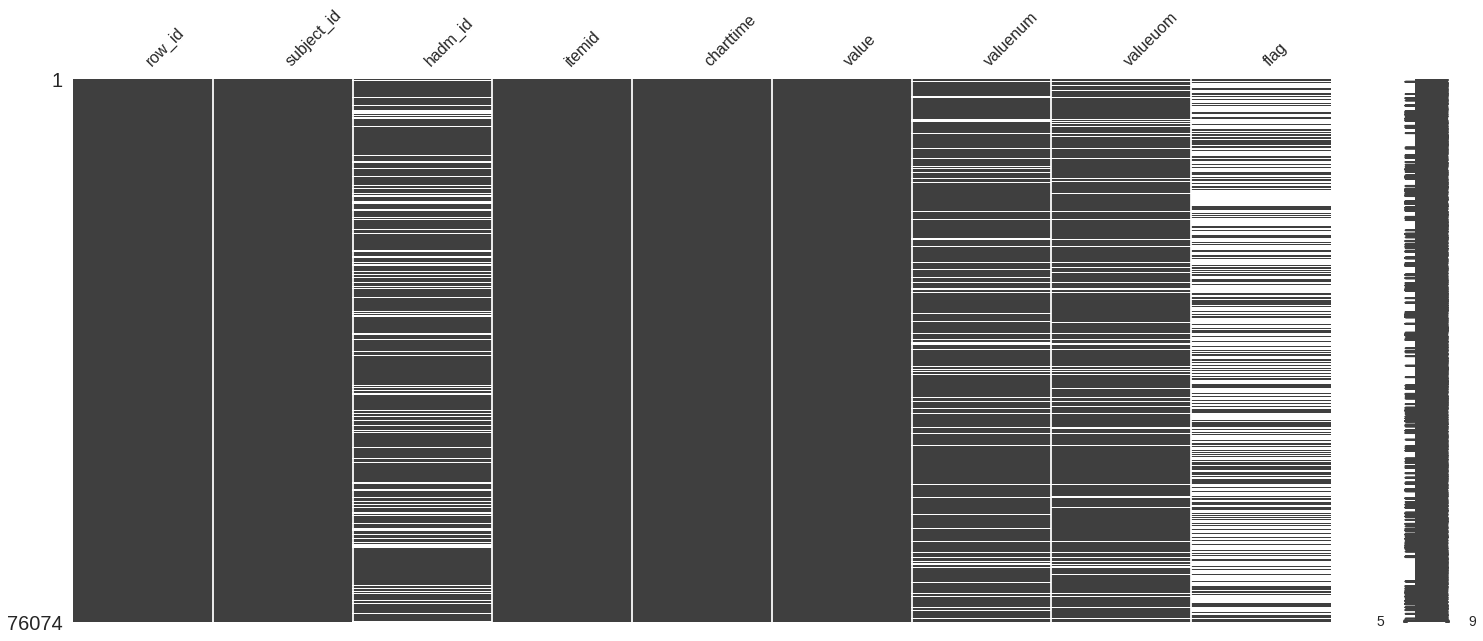

In [25]:
%matplotlib inline
msno.matrix(lab)

**Agenda**
* <b>Data Analysis and Visualization</b>
 * </b>Pandas</b>
 * </b>Missingno</b>
 * <b>Pandas-Profiling</b>
 * </b>Wordcloud</b>

## Pandas-Profiling
https://github.com/pandas-profiling/pandas-profiling <br>
Pandas-Profiling is a Python library for speed up an exploratory data analysis

### Import pandas-profiling (1/3)

In [20]:
import pandas_profiling

### Query the admissions table (2/3)

In [21]:
sql = "SELECT * FROM admissions"
a = psql.read_sql(sql, conn)
a.head(1)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,None,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1


### Profile the table (3/3)

In [22]:
pandas_profiling.ProfileReport(a)

/opt/conda/lib/python3.7/site-packages/pandas_profiling/model/correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 2).')
  correlation_name=correlation_name, error=error


**Agenda**
* <b>Data</b> Analysis and <b>Visualization</b>
 * Pandas
 * Missingno
 * Pandas-Profiling
 * <b>Wordcloud</b>

## Wordcloud
https://github.com/amueller/word_cloud <br>
Wordcloud visualizes a given text in a word-cloud format

### Import the Wordcloud package (1/4)

In [26]:
from wordcloud import WordCloud

### Prepare an input text in string (2/4)

In [27]:
text = str(a['diagnosis'].values)

### Generate a word-cloud from the input text (3/4)

In [28]:
wordcloud = WordCloud().generate(text)

### Plot the word-cloud (4/4)

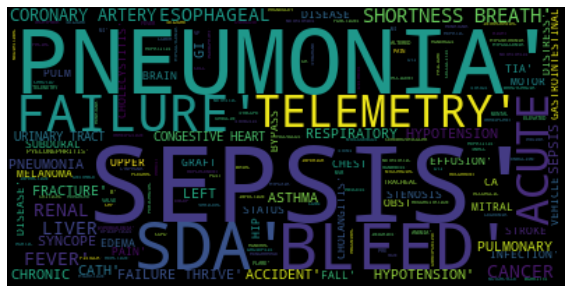

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

## Bonus Slide - Automate entity relationship diagrams

In [30]:
from sqlalchemy import MetaData
from sqlalchemy_schemadisplay import create_schema_graph

In [31]:
graph = create_schema_graph(
            metadata = MetaData(f'postgres://postgres:postgres@{DB_IP}:5432/mimic'),
            show_datatypes = False, # The image would get nasty big if we'd show the datatypes
            show_indexes = False, # ditto for indexes
            rankdir = 'LR', # From left to right (instead of top to bottom)
            concentrate = False # Don't try to join the relation lines together
)

In [32]:
graph.write_png('images/er_mimic_auto.png')

In [33]:
%%html
<img src = 'images/er_mimic_auto.png' style = 'width:1000px;'>